# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту


<h1 style="text-align:center">1. Расчет корреляций</h1>

In [1]:
N = 20
N_2 = (N ** 2 % 5) + 5
N = 20 % 5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fechner_correlation(x,y):
    same_num = 0
    diff_num = 0

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    product = (x - x_mean) * (y - y_mean)

    same_num = np.sum(product > 0)
    diff_num = np.sum(product < 0)

    return (same_num - diff_num) / (same_num + diff_num) 

def pearson_correlation(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = 0
    x_2 = 0
    y_2 = 0

    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        x_2 += (x[i] - x_mean) ** 2
        y_2 += (y[i] - y_mean) ** 2

    return   numerator / (np.sqrt(x_2 * y_2))

def spearman_correlation(x,y):

    rank_x = x.rank(method='average')
    # print(rank_x)
    rank_y = y.rank(method='average')
    # print(rank_y)
    rho = pearson_correlation(rank_x, rank_y)

    return rho

def kendalls_correlation(x,y):
    concordant = 0
    discordant = 0

    for i in range(len(x)-1):
        for j in range(i+1, len(x)):
            diff_x = x[i] - x[j]
            diff_y = y[i] - y[j]

            prod = diff_x * diff_y

            if prod > 0:
                concordant += 1 
            elif prod < 0:
                discordant += 1
    
    tau = (concordant - discordant) / (0.5 * len(x) * (len(x) - 1))
    return tau


df = pd.read_csv('../datasets/students_simple.csv')

columns = df.columns
x, y = df[columns[N]], df[columns[N_2]]

# print(columns[N%5], columns[(N_2 % 5) + 5])
# print(x, y)
print(f'Fechner correlation value: {fechner_correlation(x,y)}')
r = pearson_correlation(x,y)
print(f'Pearson correlation value: {r}')

# z-value for 95% trust interval = 1.96
z_alpha = 1.96
fisher_z = 0.5 * np.log((1+r)/(1-r))
SE = 1/np.sqrt(len(x) - 3)
lower_bound = fisher_z - (z_alpha * SE)
upper_bound = fisher_z + (z_alpha * SE)
lower_bound = (np.e ** (2 * lower_bound) - 1) / (np.e ** (2 * lower_bound) + 1)
upper_bound = (np.e ** (2 * upper_bound) - 1) / (np.e ** (2 * upper_bound) + 1)
conf_int = (lower_bound, upper_bound)

print(f'Confidence interval: {conf_int}') 

spearman_value = spearman_correlation(x,y)
print(f'Spearma correlation value: {spearman_value}')

kendalls_value = kendalls_correlation(x,y)
print(f'Kendall\'s correlation value: {kendalls_value}')




Fechner correlation value: 0.1
Pearson correlation value: 0.19437455140867985
Confidence interval: (np.float64(-0.2715072630183572), np.float64(0.5864575417309797))
Spearma correlation value: 0.1750230693403458
Kendall's correlation value: 0.11578947368421053


<h1 style="text-align: center">2. Визуализация</h1>

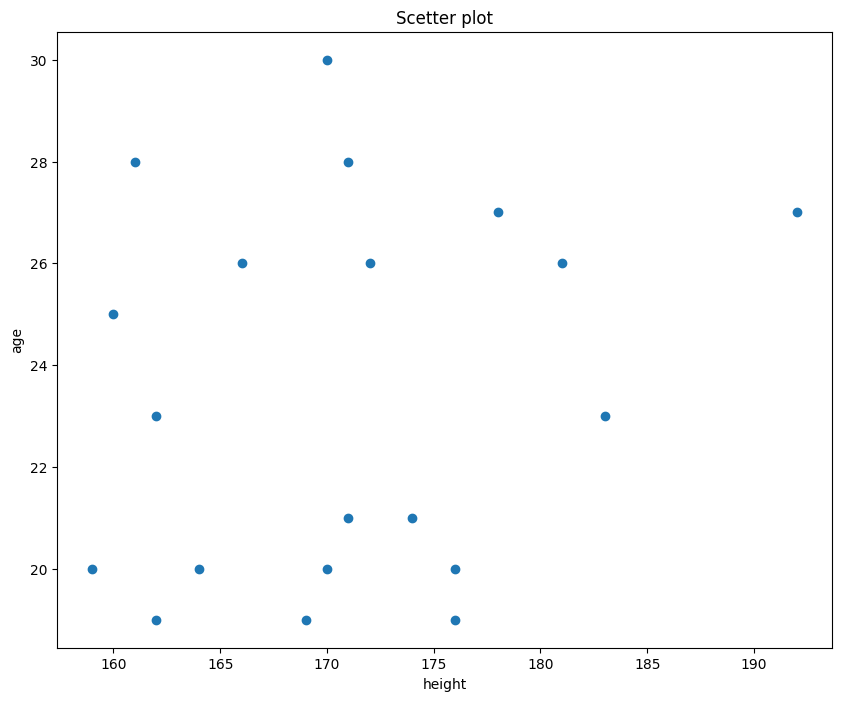

In [3]:
plt.figure(figsize=(10,8))
plt.xlabel(f'{x.name}')
plt.ylabel(f'{y.name}')
plt.title("Scetter plot")
plt.scatter(x,y)
plt.show()

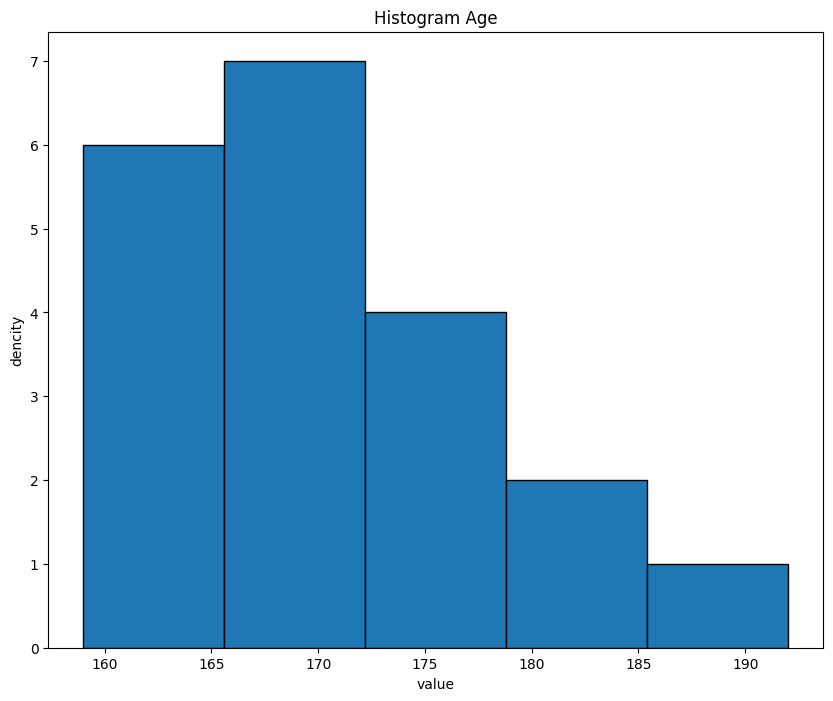

In [4]:
plt.figure(figsize=(10,8))
plt.title("Histogram Age")
plt.hist(x, bins = 1 + int(np.log2(len(x))), edgecolor='black')
plt.xlabel('value')
plt.ylabel('dencity')
plt.show()

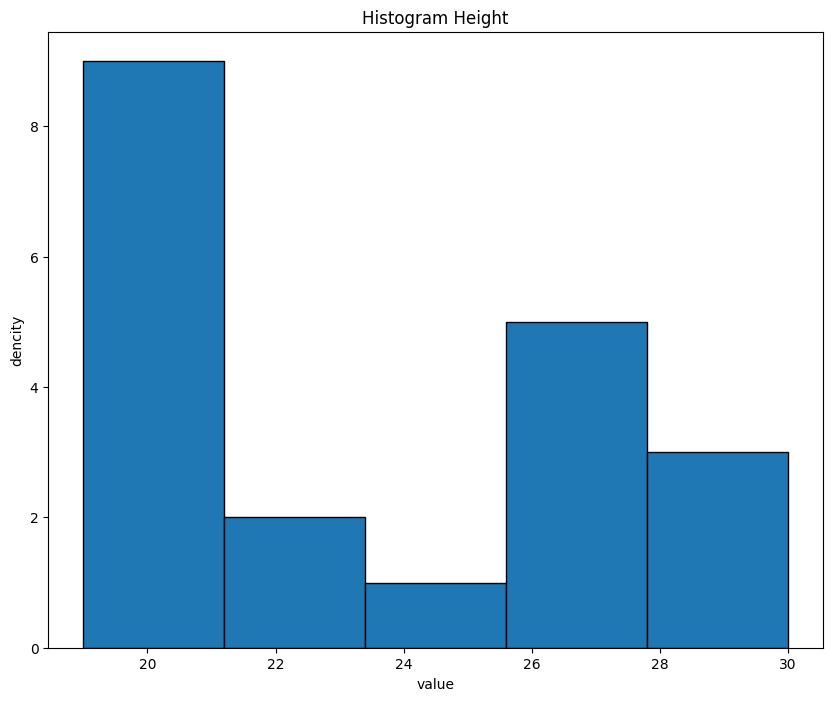

In [5]:
plt.figure(figsize=(10,8))
plt.title("Histogram Height")
plt.hist(y, bins = 1 + int(np.log2(len(y))), edgecolor='black')
plt.xlabel('value')
plt.ylabel('dencity')
plt.show()

<h1 style="text-align: center">3. Уравнение регрессии</h1>

$y=w_1 x + w_0$

In [6]:
w1_lin, w0_lin = np.polyfit(x, y, 1)

print(f"Linear: y = {w1_lin:.4f}x + {w0_lin:.4f}")

Linear: y = 0.0823x + 9.3470


$y = w_2 x^2 + w_1 x + w_0$

In [7]:
w2_quad, w1_quad, w0_quad = np.polyfit(x, y, 2)

print(f"Quadratic: y = {w2_quad:.4f}x² + {w1_quad:.4f}x + {w0_quad:.4f}")

Quadratic: y = 0.0053x² + -1.7715x + 169.6891


$y = \frac{w_1}{x} + w_0$ 

In [8]:
from scipy.optimize import curve_fit

def hyperbolic(x, w1, w0):
    return w1 / x + w0

params, _ = curve_fit(hyperbolic, x, y)
w1_hyp, w0_hyp = params
print(f"Hyperbolic: y = {w1_hyp:.4f}/x + {w0_hyp:.4f}")

Hyperbolic: y = -2351.7126/x + 37.1970


$y = w_1^x \cdot w_0$ <br>
$ln(y) = ln(w_0) + xln(w_1)$

In [9]:
log_y = np.log(y)
b, a = np.polyfit(x, log_y, 1)
w1_exp = np.exp(b)
w0_exp = np.exp(a)

print(f"Exponential: y = {w0_exp:.4f} * ({w1_exp:.4f})^x")

Exponential: y = 12.4755 * (1.0036)^x


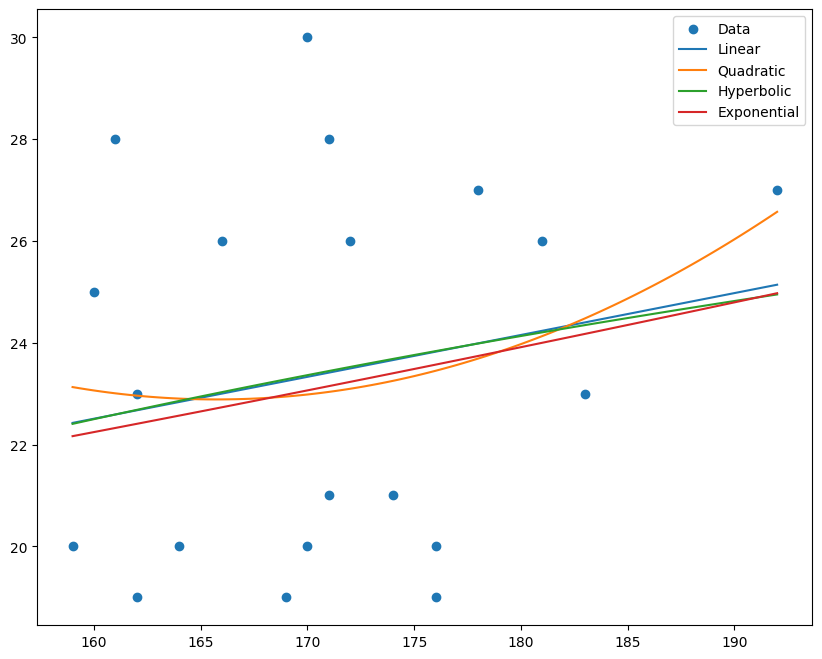

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, label="Data")
x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, w1_lin*x_range + w0_lin, label="Linear")
plt.plot(x_range, w2_quad*x_range**2 + w1_quad*x_range + w0_quad, label="Quadratic")
plt.plot(x_range, hyperbolic(x_range, *params), label="Hyperbolic")
plt.plot(x_range, w0_exp * w1_exp**x_range, label="Exponential")

plt.legend()
plt.show()

<h1 style="text-align:center">4. Проверка уравнения регрессии</h1>

In [11]:
from scipy import stats

def fisher_test(y_true, y_pred, k=1, alpha=0.05):
    n = len(y_true)
    
    # R² coefficient
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - ss_res / ss_tot

    # F-statistic
    F = (r2 / k) / ((1 - r2) / (n - k - 1))

    # critical value
    F_crit = stats.f.ppf(1 - alpha, k, n - k - 1)

    print(f"R² = {r2:.4f}")
    print(f"F_calc = {F:.4f}")
    print(f"F_crit = {F_crit:.4f}")

    if F > F_crit:
        print("✅ Model is statistically significant (fits data well)")
    else:
        print("❌ Model is not statistically significant (fits poorly)")

    return F, F_crit, r2


In [12]:
y_pred_lin = w1_lin * x + w0_lin
y_pred_quad = w2_quad * x ** 2 + w1_quad * x + w0_quad
y_pred_hyp = w1_hyp / x + w0_hyp
y_pred_exp = w0_exp * w1_exp ** x 

print(f'===Linear Model===')
fisher_test(y, y_pred_lin)
print(f'\n\n\n===Quadratic Model===')
fisher_test(y, y_pred_quad)
print(f'\n\n\n===Hyperbolic Model===')
fisher_test(y, y_pred_hyp)
print(f'\n\n\n===Exponential Model===')
F, F_crit, r2 = fisher_test(y, y_pred_exp)

===Linear Model===
R² = 0.0378
F_calc = 0.7068
F_crit = 4.4139
❌ Model is not statistically significant (fits poorly)



===Quadratic Model===
R² = 0.0559
F_calc = 1.0657
F_crit = 4.4139
❌ Model is not statistically significant (fits poorly)



===Hyperbolic Model===
R² = 0.0347
F_calc = 0.6467
F_crit = 4.4139
❌ Model is not statistically significant (fits poorly)



===Exponential Model===
R² = 0.0336
F_calc = 0.6262
F_crit = 4.4139
❌ Model is not statistically significant (fits poorly)


<h1 style="text-align:center">5. Выводы
</h1>

<h4>Изначально, на этапе подсчёта оценок корреляции, можно заметить, что данные плохо соотносятся. Данный факт можно также видеть после визуализации данных. Данные максимально разбросаны и найти хоть какую-нибудь зависимость - затруднительно. Ни одна регрессионная модель не показывает хорошие результаты при оценке соответствия с помощью критерия Фишера. Вывод - данные не поддаются предсказанию, так как нельзя выделить зависимость между признаками.<h4> 